# Food Classification using Image Classification Models


### **Introduction** :
### This notebook demonstrates how to classify food images using deep learning models. The goal is to build, train, and evaluate an image classification model on a food dataset.

#### Prerequisites


In [ ]:
#pip install matplotlib

In [ ]:
#pip install seaborn

In [ ]:
#pip install scikit-learn

In [ ]:
#pip install keras

In [ ]:
#pip install tensorflow

In [ ]:
# pip install opencv-python

In [ ]:
# or you can install it using 
# pip install tensorflow opencv-python numpy matplotlib pandas scikit-learn

### **3. Dataset Overview**
- Dataset name : The Food-101 Data Set
 - Dataset source :https://data.vision.ee.ethz.ch/cvl/datasets_extra/food-101/
- Number of classes : 101
- Number of images : 101000
- Image dimensions : maximum side length of 512 pixels.

In [1]:
### Necessary Imports

import os
import random
import shutil
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from keras.models import load_model
from sklearn.model_selection import train_test_split
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping
from tensorflow.keras import models, layers
from tensorflow.keras.applications import ResNet50, InceptionV3, VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report

In [13]:
## Function to choose random 25 classes from all classes

def select_and_copy_folders(source_dir, destination_dir, num_folders=25):
    """
    The use of this function is to select the random 25 catagories from whole dataset
    """
    all_folders = [f for f in os.listdir(source_dir) if os.path.isdir(os.path.join(source_dir, f))]
    
    # Check if there are enough folders to select
    if len(all_folders) < num_folders:
        print(f"Not enough folders to select {num_folders}. Available folders: {len(all_folders)}")
        return

    # Randomly select 25 folders
    selected_folders = random.sample(all_folders, num_folders)
    
    # Create the destination directory if it doesn't exist
    os.makedirs(destination_dir, exist_ok=True)
    
    # Copy the selected folders to the destination directory
    for folder in selected_folders:
        src_path = os.path.join(source_dir, folder)
        dst_path = os.path.join(destination_dir, folder)
        shutil.copytree(src_path, dst_path)
    
    print(f"Successfully copied {num_folders} folders to {destination_dir}.")

# Specify the source directory and destination directory
source_directory = r"D:\image classification\archive (1)\food-101\food-101\images"
destination_directory = r"D:\image classification\randomly_shuffled_data"

# Call the function
select_and_copy_folders(source_directory, destination_directory)


Successfully copied 25 folders to D:\image classification\randomly_shuffled_data.


In [18]:
## Function to divide dataset into train test and validation

def split_dataset(data_dir, output_dir, train_size=150, valid_size=40, test_size=40):
    """
    Splits a dataset into train, validation, and test folders, maintaining the category folder structure.
    The number of images per category is fixed: 150 for training, 40 for validation, and 40 for testing.

    Args:
        data_dir (str): Path to the dataset directory. Should contain category folders with images.
        output_dir (str): Path to save the train, validation, and test split folders.
        train_size (int): Number of images to use for training per category. (Default is 150)
        valid_size (int): Number of images to use for validation per category. (Default is 40)
        test_size (int): Number of images to use for testing per category. (Default is 40)
    """
    # Create train, validation, and test directories
    train_dir = os.path.join(output_dir, 'train')
    valid_dir = os.path.join(output_dir, 'valid')
    test_dir = os.path.join(output_dir, 'test')

    os.makedirs(train_dir, exist_ok=True)
    os.makedirs(valid_dir, exist_ok=True)
    os.makedirs(test_dir, exist_ok=True)

    # Iterate over each category
    for category in os.listdir(data_dir):
        category_path = os.path.join(data_dir, category)
        
        # Ensure it's a directory
        if not os.path.isdir(category_path):
            continue

        # List all image files in the category
        images = [f for f in os.listdir(category_path) if os.path.isfile(os.path.join(category_path, f))]
        
        # Ensure there are enough images to split
        if len(images) < train_size + valid_size + test_size:
            print(f"Warning: Not enough images in category '{category}' to split. Skipping this category.")
            continue

        # Shuffle the images randomly
        random.shuffle(images)

        # Select the specified number of images for each split
        train_images = images[:train_size]
        valid_images = images[train_size:train_size + valid_size]
        test_images = images[train_size + valid_size:train_size + valid_size + test_size]

        # Create category subfolders in train, validation, and test directories
        train_category_dir = os.path.join(train_dir, category)
        valid_category_dir = os.path.join(valid_dir, category)
        test_category_dir = os.path.join(test_dir, category)
        os.makedirs(train_category_dir, exist_ok=True)
        os.makedirs(valid_category_dir, exist_ok=True)
        os.makedirs(test_category_dir, exist_ok=True)

        # Move images to respective folders
        for img in train_images:
            shutil.copy(os.path.join(category_path, img), os.path.join(train_category_dir, img))
        
        for img in valid_images:
            shutil.copy(os.path.join(category_path, img), os.path.join(valid_category_dir, img))
        
        for img in test_images:
            shutil.copy(os.path.join(category_path, img), os.path.join(test_category_dir, img))

        print(f"Category '{category}' split: {len(train_images)} train, {len(valid_images)} valid, {len(test_images)} test images")

    print(f"Dataset split completed.\nTrain directory: {train_dir}\nValidation directory: {valid_dir}\nTest directory: {test_dir}")

data_directory = r"D:\image classification\randomly_shuffled_data" 
output_directory = r"D:\image classification\Data_splitted"
split_dataset(data_directory, output_directory, train_size=150, valid_size=40, test_size=40)


Category 'apple_pie' split: 150 train, 40 valid, 40 test images
Category 'baby_back_ribs' split: 150 train, 40 valid, 40 test images
Category 'beef_tartare' split: 150 train, 40 valid, 40 test images
Category 'beignets' split: 150 train, 40 valid, 40 test images
Category 'ceviche' split: 150 train, 40 valid, 40 test images
Category 'creme_brulee' split: 150 train, 40 valid, 40 test images
Category 'cup_cakes' split: 150 train, 40 valid, 40 test images
Category 'donuts' split: 150 train, 40 valid, 40 test images
Category 'edamame' split: 150 train, 40 valid, 40 test images
Category 'fish_and_chips' split: 150 train, 40 valid, 40 test images
Category 'french_onion_soup' split: 150 train, 40 valid, 40 test images
Category 'frozen_yogurt' split: 150 train, 40 valid, 40 test images
Category 'garlic_bread' split: 150 train, 40 valid, 40 test images
Category 'grilled_salmon' split: 150 train, 40 valid, 40 test images
Category 'gyoza' split: 150 train, 40 valid, 40 test images
Category 'lobste

In [2]:

# Define folder paths
train_dir = r'D:\image classification\Data_splitted\train' 
val_dir = r'D:\image classification\Data_splitted\valid' 
test_dir = r'D:\image classification\Data_splitted\test'

# Image dimensions and batch size
img_height, img_width = 224, 224
batch_size = 32


### EDA

###################################
Train set class distribution: {'apple_pie': 150, 'baby_back_ribs': 150, 'beef_tartare': 150, 'beignets': 150, 'ceviche': 150, 'creme_brulee': 150, 'cup_cakes': 150, 'donuts': 150, 'edamame': 150, 'fish_and_chips': 150, 'french_onion_soup': 150, 'frozen_yogurt': 150, 'garlic_bread': 150, 'grilled_salmon': 150, 'gyoza': 150, 'lobster_bisque': 150, 'oysters': 150, 'pad_thai': 150, 'peking_duck': 150, 'pork_chop': 150, 'sashimi': 150, 'scallops': 150, 'seaweed_salad': 150, 'shrimp_and_grits': 150, 'strawberry_shortcake': 150}
Test set class distribution: {'apple_pie': 40, 'baby_back_ribs': 40, 'beef_tartare': 40, 'beignets': 40, 'ceviche': 40, 'creme_brulee': 40, 'cup_cakes': 40, 'donuts': 40, 'edamame': 40, 'fish_and_chips': 40, 'french_onion_soup': 40, 'frozen_yogurt': 40, 'garlic_bread': 40, 'grilled_salmon': 40, 'gyoza': 40, 'lobster_bisque': 40, 'oysters': 40, 'pad_thai': 40, 'peking_duck': 40, 'pork_chop': 40, 'sashimi': 40, 'scallops': 40, 'seawee

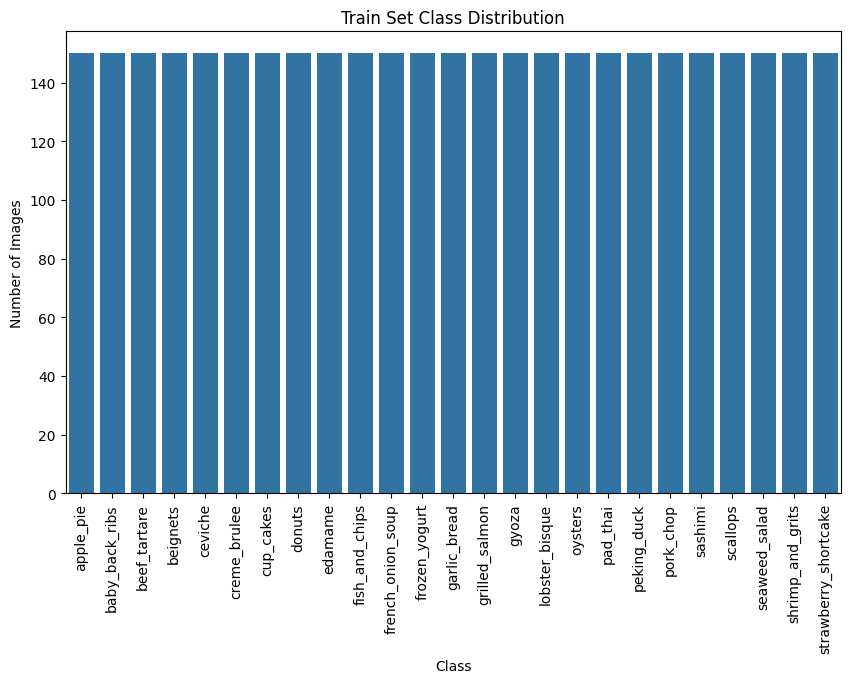

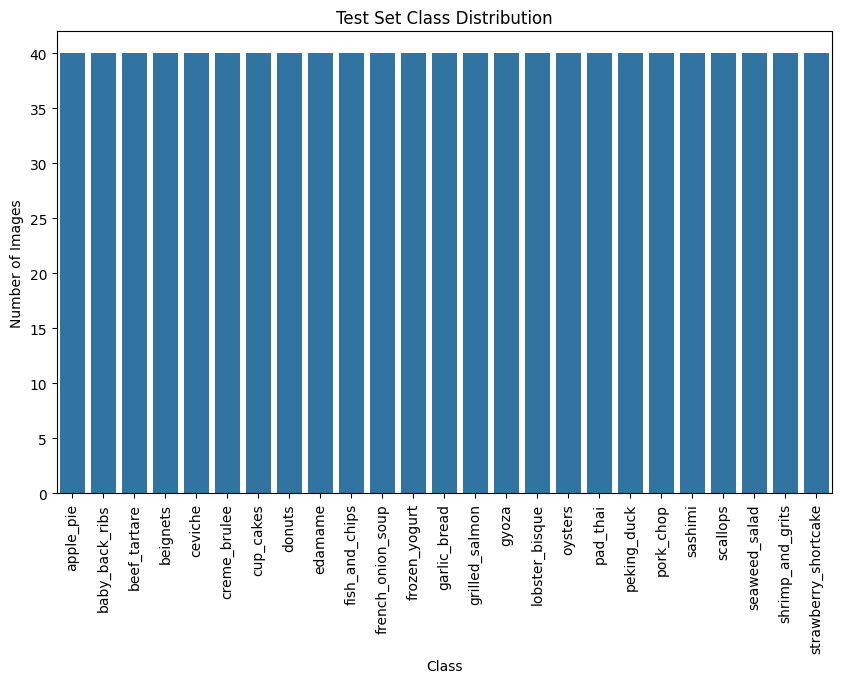

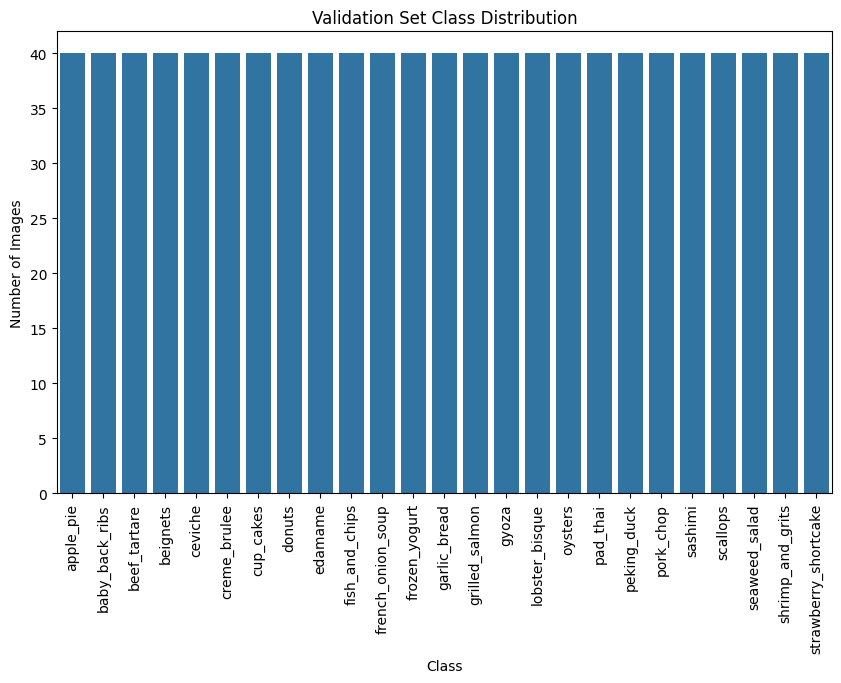

Sample images from train set:


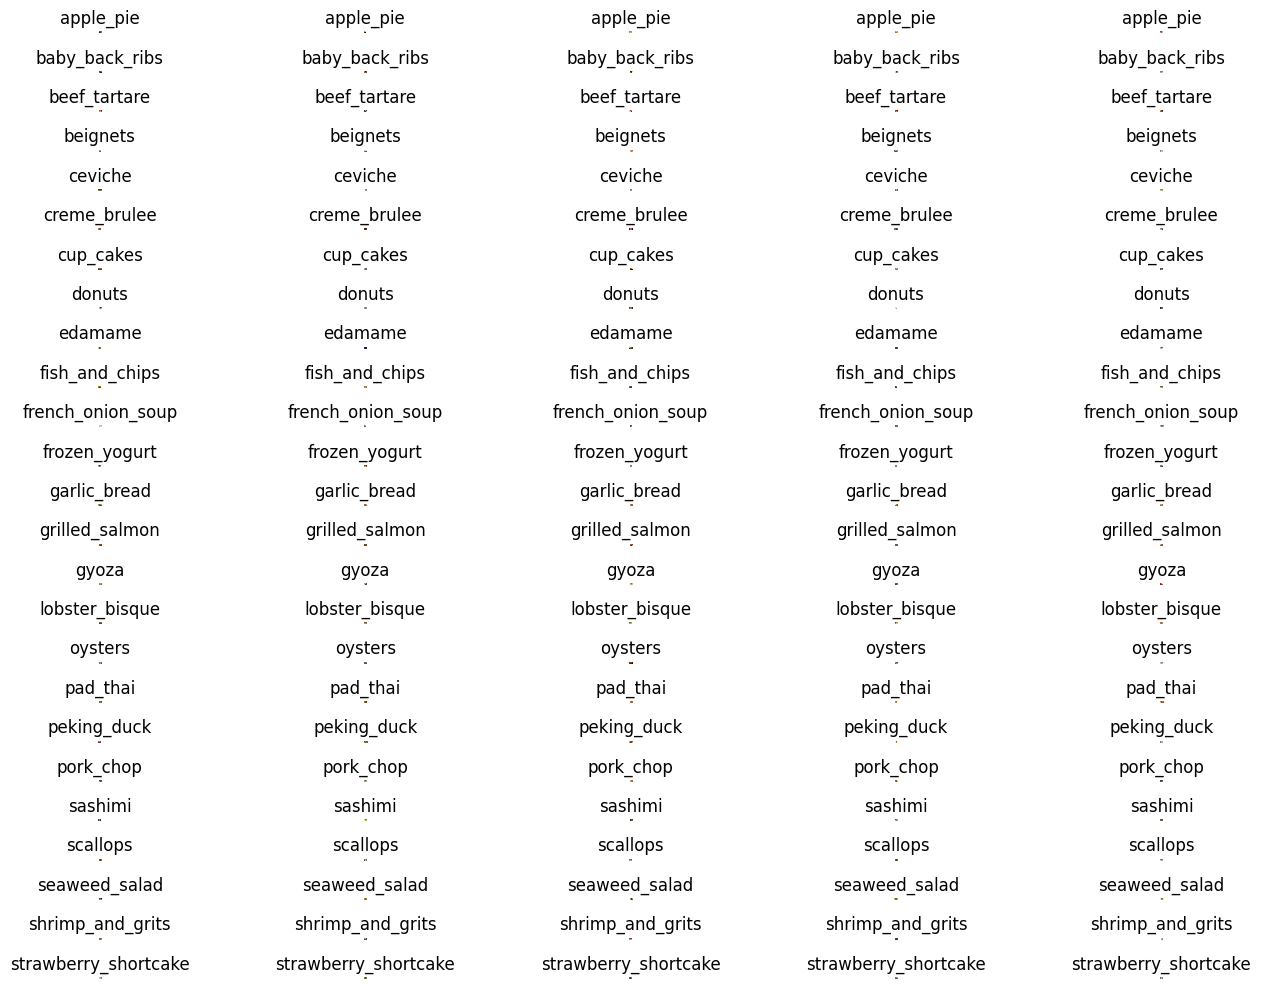

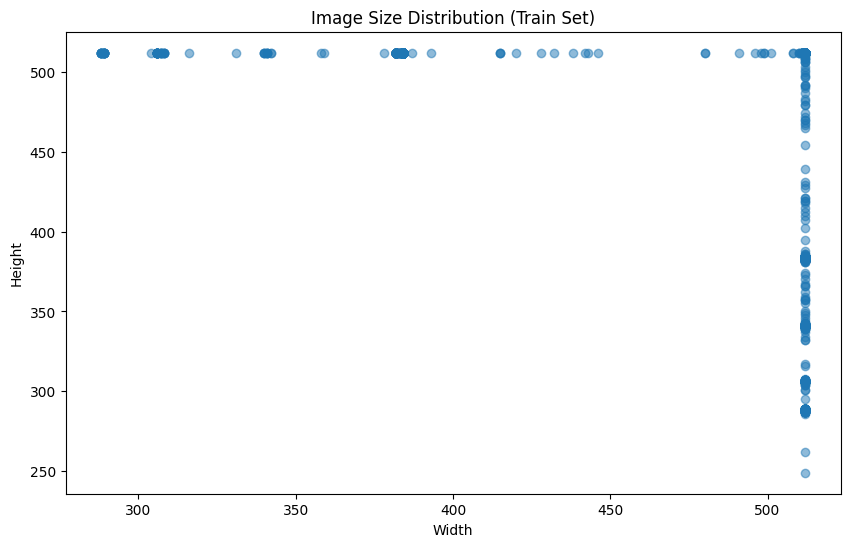

Image size summary statistics (Train Set):
Min width: 288, Max width: 512
Min height: 249, Max height: 512
Average width: 495.59, Average height: 476.52


In [34]:
###############################################################################
##########  EDA before going for model training   ###############

import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
from collections import Counter



# Function to count images in each class
def count_images_in_classes(folder_path):
    class_counts = {}
    for class_name in os.listdir(folder_path):
        class_dir = os.path.join(folder_path, class_name)
        if os.path.isdir(class_dir):
            class_counts[class_name] = len(os.listdir(class_dir))
    return class_counts

# Count images in train, test, and validation sets
train_counts = count_images_in_classes(train_dir)
test_counts = count_images_in_classes(test_dir)
valid_counts = count_images_in_classes(val_dir)

# Print class distribution
print("###################################")
print("Train set class distribution:", train_counts)
print("Test set class distribution:", test_counts)
print("Validation set class distribution:", valid_counts)
print("###################################")
# Plot class distribution
def plot_class_distribution(counts, title):
    plt.figure(figsize=(10, 6))
    sns.barplot(x=list(counts.keys()), y=list(counts.values()))
    plt.title(title)
    plt.xlabel('Class')
    plt.ylabel('Number of Images')
    plt.xticks(rotation=90)
    plt.show()

print("Class distrubutions are as follows:")
plot_class_distribution(train_counts, 'Train Set Class Distribution')
plot_class_distribution(test_counts, 'Test Set Class Distribution')
plot_class_distribution(valid_counts, 'Validation Set Class Distribution')

# Function to display sample images from each class
def display_sample_images(folder_path, num_samples=5):
    plt.figure(figsize=(15, 10))
    for i, class_name in enumerate(os.listdir(folder_path)):
        class_dir = os.path.join(folder_path, class_name)
        if os.path.isdir(class_dir):
            images = os.listdir(class_dir)[:num_samples]
            for j, image_name in enumerate(images):
                img_path = os.path.join(class_dir, image_name)
                img = Image.open(img_path)
                plt.subplot(len(os.listdir(folder_path)), num_samples, i * num_samples + j + 1)
                plt.imshow(img)
                plt.title(f'{class_name}')
                plt.axis('off')
    plt.tight_layout()
    plt.show()

# Display sample images from train set
print("Sample images from train set:")
display_sample_images(train_dir)

# Function to analyze image sizes
def analyze_image_sizes(folder_path):
    widths, heights = [], []
    for class_name in os.listdir(folder_path):
        class_dir = os.path.join(folder_path, class_name)
        if os.path.isdir(class_dir):
            for image_name in os.listdir(class_dir):
                img_path = os.path.join(class_dir, image_name)
                with Image.open(img_path) as img:
                    widths.append(img.width)
                    heights.append(img.height)
    return widths, heights

# Analyze image sizes in train set
train_widths, train_heights = analyze_image_sizes(train_dir)

# Plot image size distribution
plt.figure(figsize=(10, 6))
plt.scatter(train_widths, train_heights, alpha=0.5)
plt.title('Image Size Distribution (Train Set)')
plt.xlabel('Width')
plt.ylabel('Height')
plt.show()

# Print summary statistics
print("Image size summary statistics (Train Set):")
print(f"Min width: {min(train_widths)}, Max width: {max(train_widths)}")
print(f"Min height: {min(train_heights)}, Max height: {max(train_heights)}")
print(f"Average width: {np.mean(train_widths):.2f}, Average height: {np.mean(train_heights):.2f}")

Inferences from EDA:
images are of same numbers and there are no number difference in images
Image sizes are as below:
Min width: 288, Max width: 512
Min height: 249, Max height: 512
Average width: 495.59, Average height: 476.52

############

- Resize images is not necessary.

- We dont need to ddress class imbalance using techniques like data augmentation or oversampling.

 - Ensured that the dataset is clean and correctly labeled.

### Data Augmentation 

In [3]:

# Data generators with augmentation for training and rescaling for validation/test
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

## Meanings
# Rotation: Images are rotated by up to 20 degrees.
# Width Shift: Images are shifted horizontally by up to 20% of the image width.
# Height Shift: Images are shifted vertically by up to 20% of the image height.
# Shear: Images are sheared by up to 20%.
# Zoom: Images are zoomed in or out by up to 20%.
# Horizontal Flip: Images are flipped horizontally  with a 50% probability.
# Fill Mode: After transformations, any empty pixels are filled using the nearest pixel value.

val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)


In [4]:

# Load data from folders
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

### if it is binary then change the class_mode to binary

Found 3750 images belonging to 25 classes.
Found 1000 images belonging to 25 classes.
Found 1000 images belonging to 25 classes.


## Extractor 1 : *Simple Sequential network*

In [5]:
# Define the model architecture
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(train_generator.num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
epochs = 100
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    validation_data=val_generator,
    validation_steps=val_generator.samples // batch_size,
    epochs=epochs,
    verbose = 2
)



D:\image classification\food_classify\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
D:\image classification\food_classify\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/100
117/117 - 100s - 853ms/step - accuracy: 0.0729 - loss: 3.1640 - val_accuracy: 0.1008 - val_loss: 3.0552
Epoch 2/100


D:\image classification\food_classify\Lib\site-packages\keras\src\trainers\epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


117/117 - 6s - 51ms/step - accuracy: 0.1250 - loss: 2.9808 - val_accuracy: 0.0968 - val_loss: 3.0541
Epoch 3/100
117/117 - 79s - 674ms/step - accuracy: 0.1162 - loss: 2.9951 - val_accuracy: 0.1089 - val_loss: 3.0739
Epoch 4/100
117/117 - 6s - 49ms/step - accuracy: 0.0625 - loss: 3.2082 - val_accuracy: 0.1079 - val_loss: 3.0462
Epoch 5/100
117/117 - 77s - 662ms/step - accuracy: 0.1345 - loss: 2.9020 - val_accuracy: 0.1653 - val_loss: 2.8418
Epoch 6/100
117/117 - 6s - 49ms/step - accuracy: 0.0938 - loss: 2.7568 - val_accuracy: 0.1593 - val_loss: 2.8566
Epoch 7/100
117/117 - 78s - 670ms/step - accuracy: 0.1727 - loss: 2.7989 - val_accuracy: 0.1855 - val_loss: 2.8064
Epoch 8/100
117/117 - 6s - 49ms/step - accuracy: 0.1250 - loss: 2.8473 - val_accuracy: 0.1804 - val_loss: 2.8222
Epoch 9/100
117/117 - 78s - 669ms/step - accuracy: 0.1904 - loss: 2.7416 - val_accuracy: 0.2097 - val_loss: 2.7347
Epoch 10/100
117/117 - 6s - 48ms/step - accuracy: 0.2500 - loss: 2.3235 - val_accuracy: 0.2157 - val

In [8]:
# Save the model
#model.save('trained_model_Sequential.h5')
from keras.preprocessing import image  # Import the image module

# Load the model
model = load_model('trained_model_Sequential.h5')
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Preprocess the image
img_path = r'D:\image classification\Data_splitted\valid\beef_tartare\181859.jpg'
img = image.load_img(img_path, target_size=(img_height, img_width))  # Match input shape
img = image.img_to_array(img)
img = np.expand_dims(img, axis=0)
img = img / 255.0  # Normalize pixel values

# Get predictions
predictions = model.predict(img)
predicted_class = np.argmax(predictions, axis=1)

# Map to class labels
class_labels = list(train_generator.class_indices.keys())
predicted_label = class_labels[predicted_class[0]]

print("Predicted class index:", predicted_class[0])
print("Predicted label:", predicted_label)
print("Prediction probabilities:", predictions)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step
Predicted class index: 7
Predicted label: donuts
Prediction probabilities: [[0.01313584 0.02566732 0.11409623 0.01288028 0.10054088 0.02760068
  0.0645057  0.12863915 0.00079844 0.0300945  0.01237813 0.02816422
  0.03442336 0.01452228 0.00814329 0.01585377 0.02419167 0.04626671
  0.04464714 0.0675584  0.02554499 0.01511373 0.00053459 0.02050066
  0.12419796]]


In [9]:
# Extract training and validation metrics
training_accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']
training_loss = history.history['loss']
validation_loss = history.history['val_loss']

In [10]:
# Print training and validation accuracy and loss for each epoch
print("Training Statistics:")
for epoch in range(epochs):
    print(f"Epoch {epoch + 1}/{epochs}")
    print(f"Training Accuracy: {training_accuracy[epoch]:.4f}, Training Loss: {training_loss[epoch]:.4f}")
    print(f"Validation Accuracy: {validation_accuracy[epoch]:.4f}, Validation Loss: {validation_loss[epoch]:.4f}")
    print("-----------------------------")

Training Statistics:
Epoch 1/100
Training Accuracy: 0.0729, Training Loss: 3.1640
Validation Accuracy: 0.1008, Validation Loss: 3.0552
-----------------------------
Epoch 2/100
Training Accuracy: 0.1250, Training Loss: 2.9808
Validation Accuracy: 0.0968, Validation Loss: 3.0541
-----------------------------
Epoch 3/100
Training Accuracy: 0.1162, Training Loss: 2.9951
Validation Accuracy: 0.1089, Validation Loss: 3.0739
-----------------------------
Epoch 4/100
Training Accuracy: 0.0625, Training Loss: 3.2082
Validation Accuracy: 0.1079, Validation Loss: 3.0462
-----------------------------
Epoch 5/100
Training Accuracy: 0.1345, Training Loss: 2.9020
Validation Accuracy: 0.1653, Validation Loss: 2.8418
-----------------------------
Epoch 6/100
Training Accuracy: 0.0938, Training Loss: 2.7568
Validation Accuracy: 0.1593, Validation Loss: 2.8566
-----------------------------
Epoch 7/100
Training Accuracy: 0.1727, Training Loss: 2.7989
Validation Accuracy: 0.1855, Validation Loss: 2.8064
-

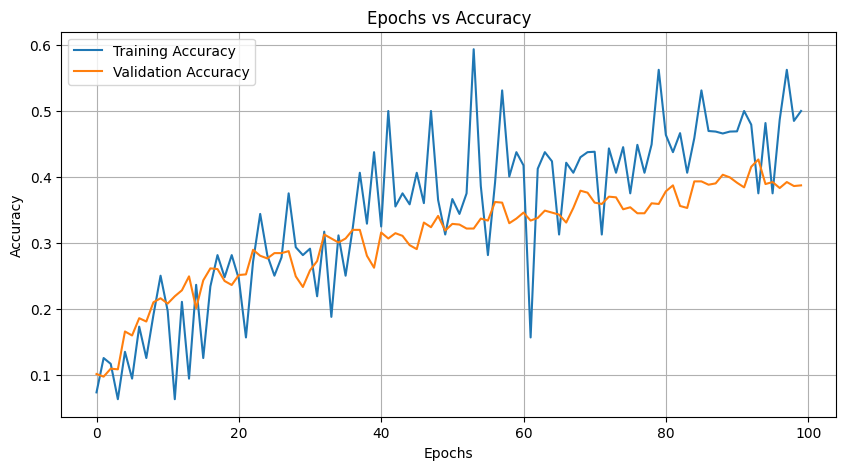

In [11]:
import matplotlib.pyplot as plt

# Plot accuracy
plt.figure(figsize=(10, 5))
plt.plot(training_accuracy, label='Training Accuracy')
plt.plot(validation_accuracy, label='Validation Accuracy')
plt.title('Epochs vs Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

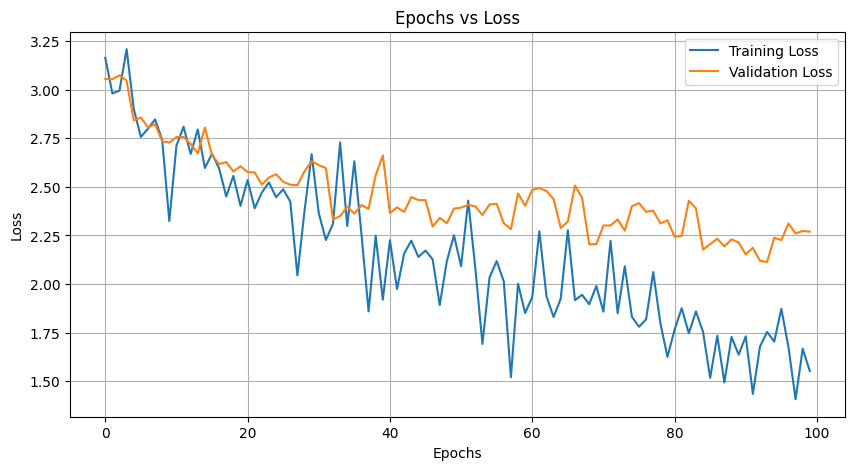

In [12]:
# Plot loss
plt.figure(figsize=(10, 5))
plt.plot(training_loss, label='Training Loss')
plt.plot(validation_loss, label='Validation Loss')
plt.title('Epochs vs Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()

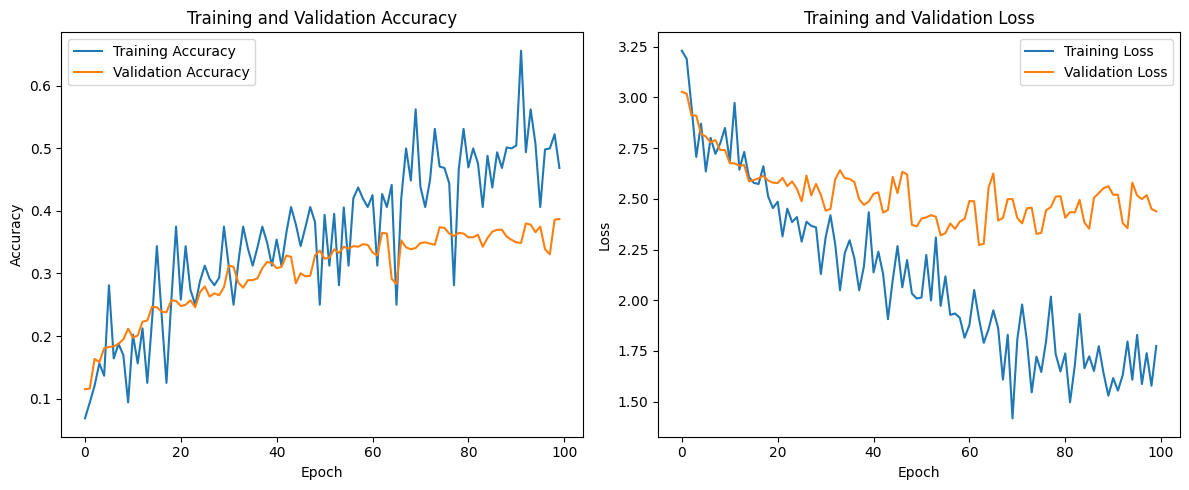

In [24]:

# Plot training and validation accuracy
plt.figure(figsize=(12, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

## Extractor 2 : **ResNet50**

In [15]:

# Load the ResNet50 model with pre-trained weights
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))

# Freeze the base model (optional, for transfer learning)
base_model.trainable = False

# Add custom layers on top of ResNet50
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(1024, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(train_generator.num_classes, activation='softmax') 
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [16]:

# Train the model
epochs = 100
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    validation_data=val_generator,
    validation_steps=val_generator.samples // batch_size,
    epochs=epochs
)


Epoch 1/100
117/117 ━━━━━━━━━━━━━━━━━━━━ 182s 1s/step - accuracy: 0.0508 - loss: 3.5073 - val_accuracy: 0.0484 - val_loss: 3.2085
Epoch 2/100
117/117 ━━━━━━━━━━━━━━━━━━━━ 34s 284ms/step - accuracy: 0.0938 - loss: 3.1689 - val_accuracy: 0.0514 - val_loss: 3.2076
Epoch 3/100
117/117 ━━━━━━━━━━━━━━━━━━━━ 169s 1s/step - accuracy: 0.0486 - loss: 3.2192 - val_accuracy: 0.0625 - val_loss: 3.1990
Epoch 4/100
117/117 ━━━━━━━━━━━━━━━━━━━━ 35s 290ms/step - accuracy: 0.0625 - loss: 3.2063 - val_accuracy: 0.0645 - val_loss: 3.1990
Epoch 5/100
117/117 ━━━━━━━━━━━━━━━━━━━━ 179s 2s/step - accuracy: 0.0524 - loss: 3.2076 - val_accuracy: 0.0615 - val_loss: 3.1874
Epoch 6/100
117/117 ━━━━━━━━━━━━━━━━━━━━ 41s 344ms/step - accuracy: 0.0938 - loss: 3.1954 - val_accuracy: 0.0605 - val_loss: 3.1869
Epoch 7/100
117/117 ━━━━━━━━━━━━━━━━━━━━ 186s 2s/step - accuracy: 0.0545 - loss: 3.1934 - val_accuracy: 0.0625 - val_loss: 3.1685
Epoch 8/100
117/117 ━━━━━━━━━━━━━━━━━━━━ 38s 319ms/step - accuracy: 0.0000e+00 - los

In [17]:
# Save the model
model.save('trained_model_RESNET50.h5')
from keras.preprocessing import image  # Import the image module

# Load the model
model = load_model('trained_model_RESNET50.h5')
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Preprocess the image
img_path = r'D:\image classification\Data_splitted\valid\beef_tartare\181859.jpg'
img = image.load_img(img_path, target_size=(img_height, img_width))  # Match input shape
img = image.img_to_array(img)
img = np.expand_dims(img, axis=0)
img = img / 255.0  # Normalize pixel values

# Get predictions
predictions = model.predict(img)
predicted_class = np.argmax(predictions, axis=1)

# Map to class labels
class_labels = list(train_generator.class_indices.keys())
predicted_label = class_labels[predicted_class[0]]

print("Predicted class index:", predicted_class[0])
print("Predicted label:", predicted_label)
print("Prediction probabilities:", predictions)


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Predicted class index: 12
Predicted label: garlic_bread
Prediction probabilities: [[0.04834119 0.0262733  0.04335929 0.04681303 0.03346686 0.05181807
  0.02840879 0.03428937 0.03338365 0.03628371 0.05508837 0.03773075
  0.05888065 0.04373885 0.04157101 0.05816375 0.01777979 0.02622706
  0.03093191 0.03993222 0.04826154 0.04476403 0.02822485 0.0473066
  0.03896127]]


In [18]:
# Extract training and validation metrics
training_accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']
training_loss = history.history['loss']
validation_loss = history.history['val_loss']

In [19]:
# Print training and validation accuracy and loss for each epoch
print("Training Statistics:")
for epoch in range(epochs):
    print(f"Epoch {epoch + 1}/{epochs}")
    print(f"Training Accuracy: {training_accuracy[epoch]:.4f}, Training Loss: {training_loss[epoch]:.4f}")
    print(f"Validation Accuracy: {validation_accuracy[epoch]:.4f}, Validation Loss: {validation_loss[epoch]:.4f}")
    print("-----------------------------")

Training Statistics:
Epoch 1/100
Training Accuracy: 0.0465, Training Loss: 3.3478
Validation Accuracy: 0.0484, Validation Loss: 3.2085
-----------------------------
Epoch 2/100
Training Accuracy: 0.0938, Training Loss: 3.1689
Validation Accuracy: 0.0514, Validation Loss: 3.2076
-----------------------------
Epoch 3/100
Training Accuracy: 0.0484, Training Loss: 3.2154
Validation Accuracy: 0.0625, Validation Loss: 3.1990
-----------------------------
Epoch 4/100
Training Accuracy: 0.0625, Training Loss: 3.2063
Validation Accuracy: 0.0645, Validation Loss: 3.1990
-----------------------------
Epoch 5/100
Training Accuracy: 0.0508, Training Loss: 3.2070
Validation Accuracy: 0.0615, Validation Loss: 3.1874
-----------------------------
Epoch 6/100
Training Accuracy: 0.0938, Training Loss: 3.1954
Validation Accuracy: 0.0605, Validation Loss: 3.1869
-----------------------------
Epoch 7/100
Training Accuracy: 0.0573, Training Loss: 3.1925
Validation Accuracy: 0.0625, Validation Loss: 3.1685
-

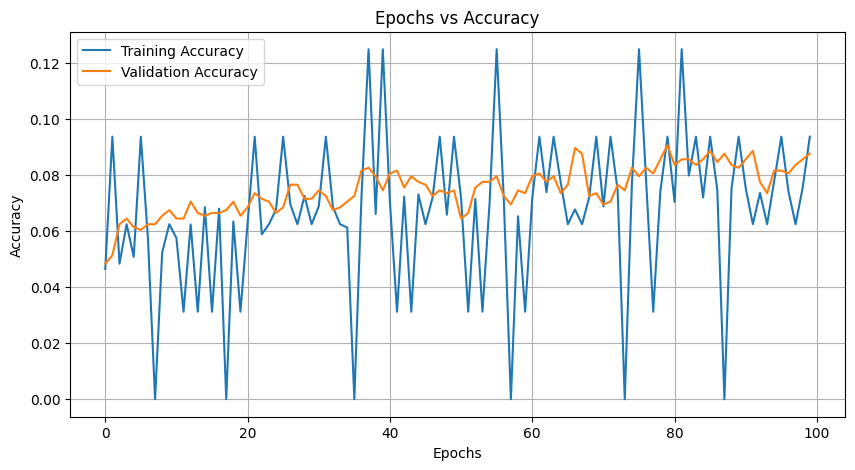

In [20]:
import matplotlib.pyplot as plt

# Plot accuracy
plt.figure(figsize=(10, 5))
plt.plot(training_accuracy, label='Training Accuracy')
plt.plot(validation_accuracy, label='Validation Accuracy')
plt.title('Epochs vs Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

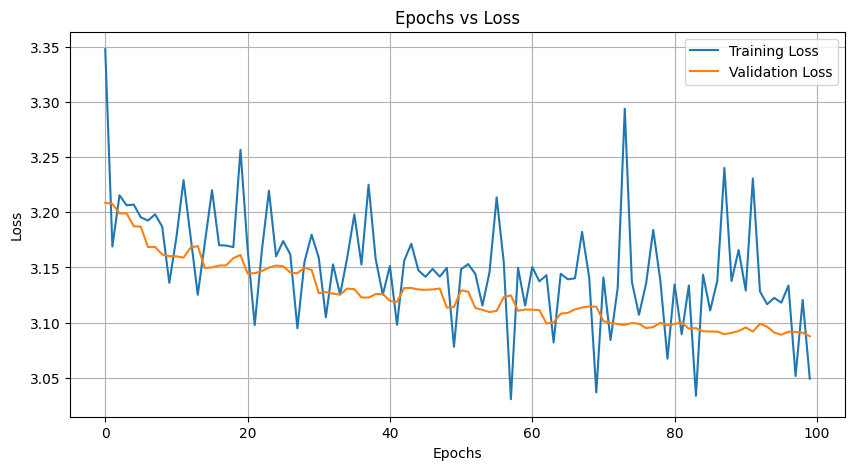

In [21]:
# Plot loss
plt.figure(figsize=(10, 5))
plt.plot(training_loss, label='Training Loss')
plt.plot(validation_loss, label='Validation Loss')
plt.title('Epochs vs Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()

In [37]:
# Print the names of all layers in the base_model (ResNet50)
for i, layer in enumerate(base_model.layers):
    print(i, layer.name)

0 input_layer_9
1 conv2d_103
2 batch_normalization_94
3 activation_94
4 conv2d_104
5 batch_normalization_95
6 activation_95
7 conv2d_105
8 batch_normalization_96
9 activation_96
10 max_pooling2d_13
11 conv2d_106
12 batch_normalization_97
13 activation_97
14 conv2d_107
15 batch_normalization_98
16 activation_98
17 max_pooling2d_14
18 conv2d_111
19 batch_normalization_102
20 activation_102
21 conv2d_109
22 conv2d_112
23 batch_normalization_100
24 batch_normalization_103
25 activation_100
26 activation_103
27 average_pooling2d_9
28 conv2d_108
29 conv2d_110
30 conv2d_113
31 conv2d_114
32 batch_normalization_99
33 batch_normalization_101
34 batch_normalization_104
35 batch_normalization_105
36 activation_99
37 activation_101
38 activation_104
39 activation_105
40 mixed0
41 conv2d_118
42 batch_normalization_109
43 activation_109
44 conv2d_116
45 conv2d_119
46 batch_normalization_107
47 batch_normalization_110
48 activation_107
49 activation_110
50 average_pooling2d_10
51 conv2d_115
52 conv2d

## Extractor 2 : **InceptionV3**

In [24]:

# Load the InceptionV3 model with pre-trained weights
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))

# Freeze the base model (optional, for transfer learning)
base_model.trainable = False

# Add custom layers on top of InceptionV3
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),  # Global average pooling to reduce dimensions
    layers.Dense(1024, activation='relu'),  # Fully connected layer
    layers.Dropout(0.5),  # Dropout for regularization
    layers.Dense(train_generator.num_classes, activation='softmax')  # Output layer
])


In [25]:

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])




In [26]:
# Train the model
epochs = 100
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    validation_data=val_generator,
    validation_steps=val_generator.samples // batch_size,
    epochs=epochs
)

Epoch 1/100



KeyboardInterrupt



32/32 ━━━━━━━━━━━━━━━━━━━━ 24s 733ms/step - accuracy: 0.6843 - loss: 1.0437

Test accuracy: 0.69
Model weights saved to 'model_weights_InceptionV3\food_classifier_InceptionV3_weights.weights.h5'.


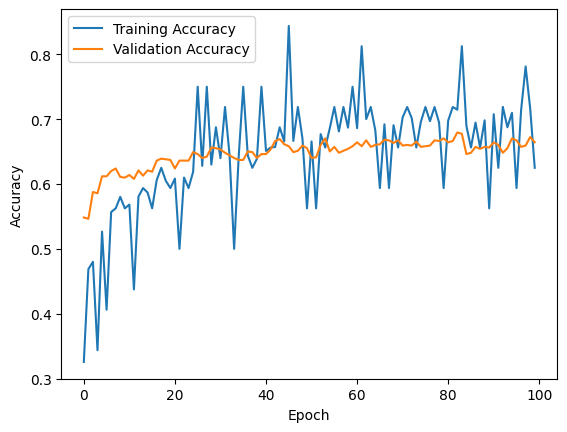

In [13]:

# Define the folder to save model weights
weights_folder = 'model_weights_InceptionV3'

# Create the folder if it doesn't exist
if not os.path.exists(weights_folder):
    os.makedirs(weights_folder)

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_generator)
print(f'\nTest accuracy: {test_acc:.2f}')

# Save the model weights inside the folder
weights_path = os.path.join(weights_folder, 'food_classifier_InceptionV3_weights.weights.h5')
model.save_weights(weights_path)
print(f"Model weights saved to '{weights_path}'.")

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

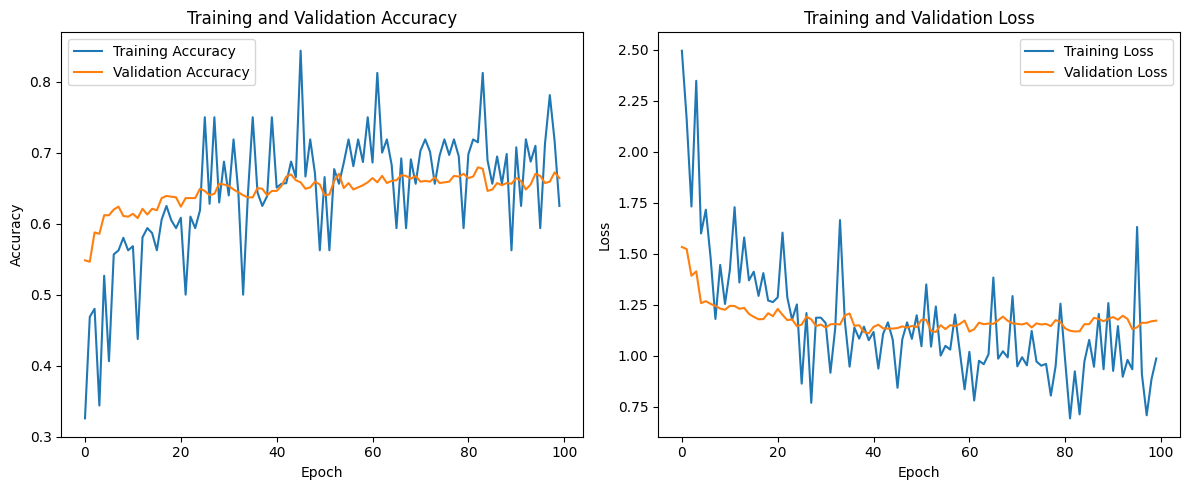

In [14]:
# Plot training and validation accuracy
plt.figure(figsize=(12, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [16]:
for i, layer in enumerate(base_model.layers):
    print(i, layer.name)

0 input_layer_3
1 conv2d_282
2 batch_normalization_282
3 activation_282
4 conv2d_283
5 batch_normalization_283
6 activation_283
7 conv2d_284
8 batch_normalization_284
9 activation_284
10 max_pooling2d_12
11 conv2d_285
12 batch_normalization_285
13 activation_285
14 conv2d_286
15 batch_normalization_286
16 activation_286
17 max_pooling2d_13
18 conv2d_290
19 batch_normalization_290
20 activation_290
21 conv2d_288
22 conv2d_291
23 batch_normalization_288
24 batch_normalization_291
25 activation_288
26 activation_291
27 average_pooling2d_27
28 conv2d_287
29 conv2d_289
30 conv2d_292
31 conv2d_293
32 batch_normalization_287
33 batch_normalization_289
34 batch_normalization_292
35 batch_normalization_293
36 activation_287
37 activation_289
38 activation_292
39 activation_293
40 mixed0
41 conv2d_297
42 batch_normalization_297
43 activation_297
44 conv2d_295
45 conv2d_298
46 batch_normalization_295
47 batch_normalization_298
48 activation_295
49 activation_298
50 average_pooling2d_28
51 conv2d_

In [22]:
!pip freeze > requirements.txt

In [ ]:
########################################################################################################

In [ ]:
Hyperparameter tuning experiments can be done for VGG 19 network:

1. Filter size & number of filters:
 Experiment with filter sizes (e.g., 3x3, 5x5) and the number of filters per layer to balance model capacity and computational complexity.
Reasoning : bigger the filter sizes , bigger the resceptive fields
            More number of filters means more detailed feature extraction

2. Activation function: We can try different activations like ReLU, Leaky ReLU, or Swish for better performance and stability.
   Reasoning : Activation functions can be used as hyper parameter to ensure sending proper inputs for next LeakyReluGrad

3. Dropout rate: Tune dropout rates to prevent overfitting.
 Reasoning : Dropout forces other layers to work harder so how much drop out we have to put, we can decide on that


4 . Optimizer & learning rate: Experiment with optimizers (Adam, SGD) and tune learning rates for better convergence.
  Reasoning : Which learning can achive better convergence and find roots, we can decide on that

5. Batch size & epochs: Adjust batch size (32–128) and number of epochs to ensure optimal model training.
  Reasoning: In general observation, more the epochs, more the accuracy until cetrain layers and batch can guide the rate of training